#TODO
- what are we going to do with the outliers in our data 
- What do we do with the embarked parameter? keep it? drop it? 

Things done to the data:
- Mapped Sex to be a binary classification with male = 1 and female = 0
- Imputed Missing Values. 
  - Cabin was removed due to having to many missing values
  - We filled missing Age values with the mean of the Age values
  - We also filled missing Embarked values with the mode of the embarked values.

Info about the data:
- Pclass (Passenger Class): 
  - refers to the class of the passengers. Pclass = 1 was upper class Pclass = 2 middle class Pclass = 3 lower class
  - Pclass plays a significant role the the survival rate of passengers. likely because they had better access to life boats.
- Parch (Parents and Children):
  - Parch = 0: The passenger had no parents or children with them
  - Parch = 1: the passenger was treveling either one parent or one child
  - Parch = 2: The passenger had two parents/children, and so on.
- SibSp (Sibling and Spouses)
  - SibSp = 0: The passenger had no siblings or spouse with them.
  - SibSp = 1: The passenger was traveling with one sibling or spouse.
  - SibSp = 2: The passenger had two siblings or a combination of siblings and spouse with them, and so on.
- Embarked
  - S: Southampton
  - C: Cherbourg
  - Q: Queenstown

Some EDA (More should follow):
- Correlation Matrix
  - Survived has a negative correlation with Pclass at -0.34 meaning that as pclass increase (the lower class status you are) the lower your chances of survival are.
  - Fare is positively correlated with survival 0.26 which tells us that people who paid more for their ticket had better odds of surviving. Likely because they are wealthy and are grouped in pclass=1.
  - SibSp and Parch have a slight positive correlation with survival. which tells us that passengers with family members onboard might have had slighly better survival chances.
- Sex vs. Survival:
  - Woman had a much higher survival rate (~75%) compared to males (~20%)
- Pclass vs Survival
  - 1st class had the highest survival rate ~65%
  - 3rd class had the lowers survival rate >30%
  - The survival rate generally decreases as passenger class increases. (wealthier passengers had a higher chance of living)
- Age vs Survival
  - Children (under 12) had the highest survival rate ~60%
  - Seniors (over 60) had the lowest survival rate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
   

/var/folders/4j/2vwq5lfj3m3399dm2npr95l00000gn/T/ipykernel_24813/4294750472.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/4j/2vwq5lfj3m3399dm2npr95l00000gn/T/ipykernel_24813/4294750472.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


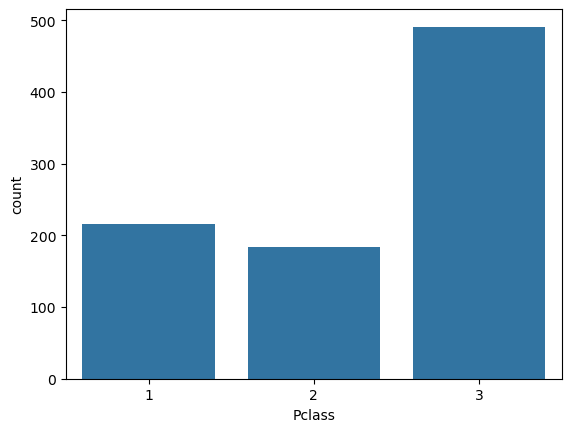

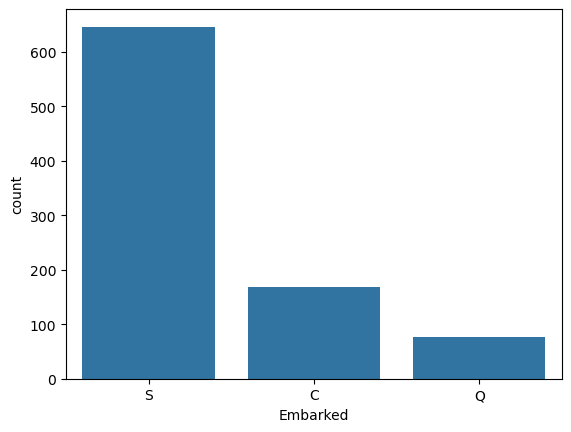

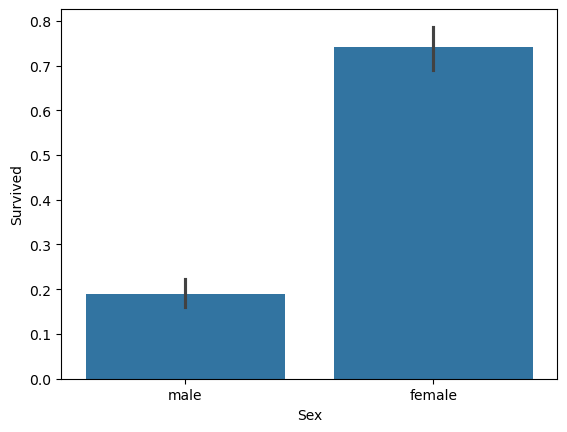

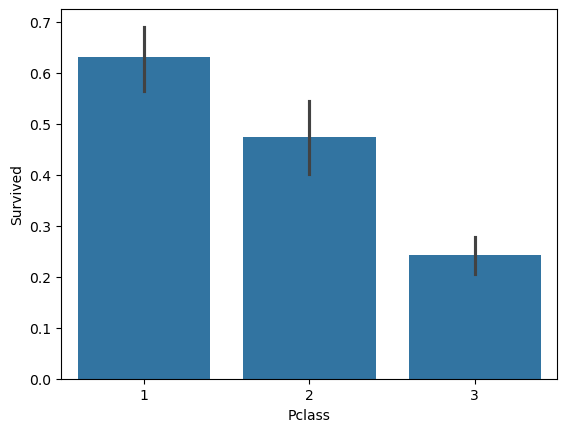

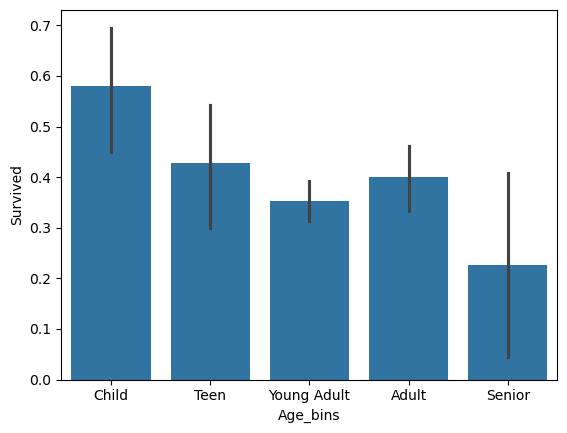

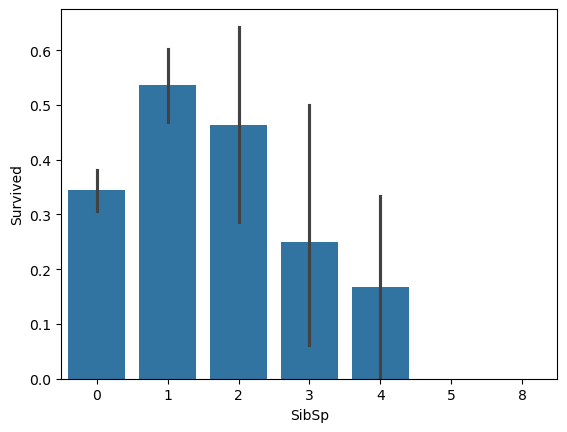

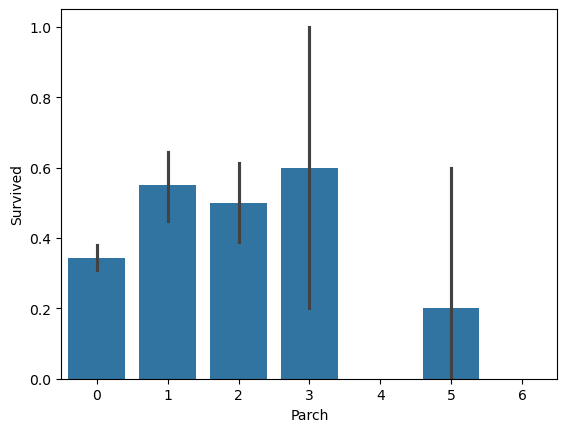

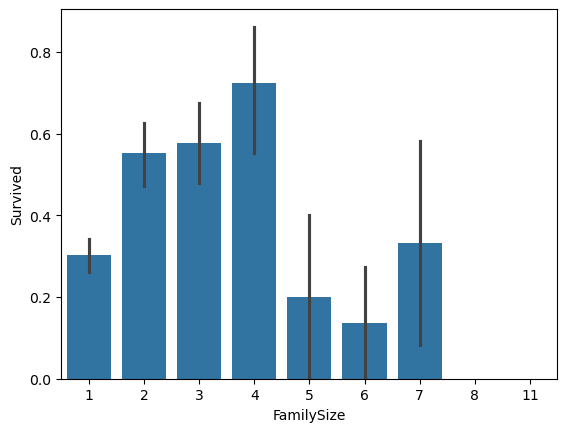

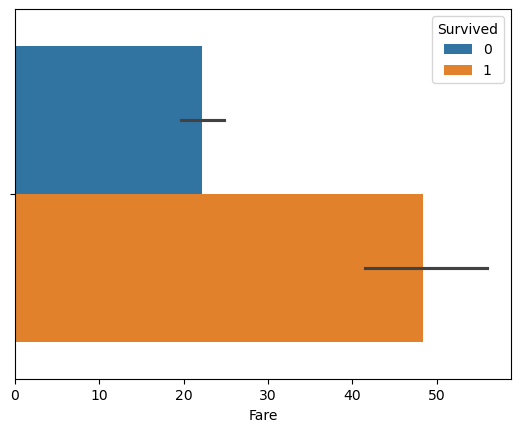

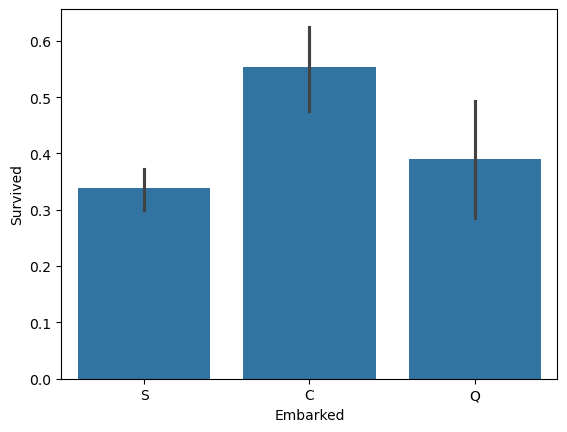

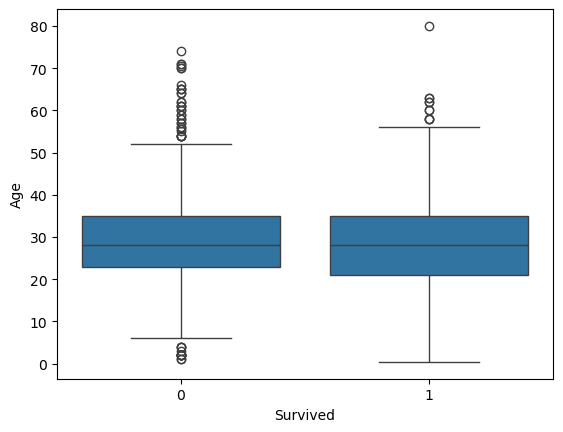

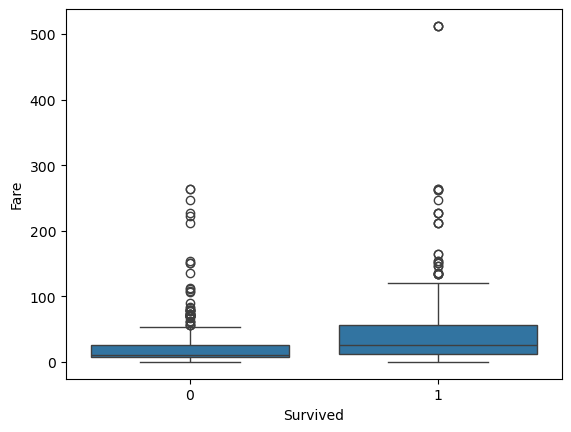

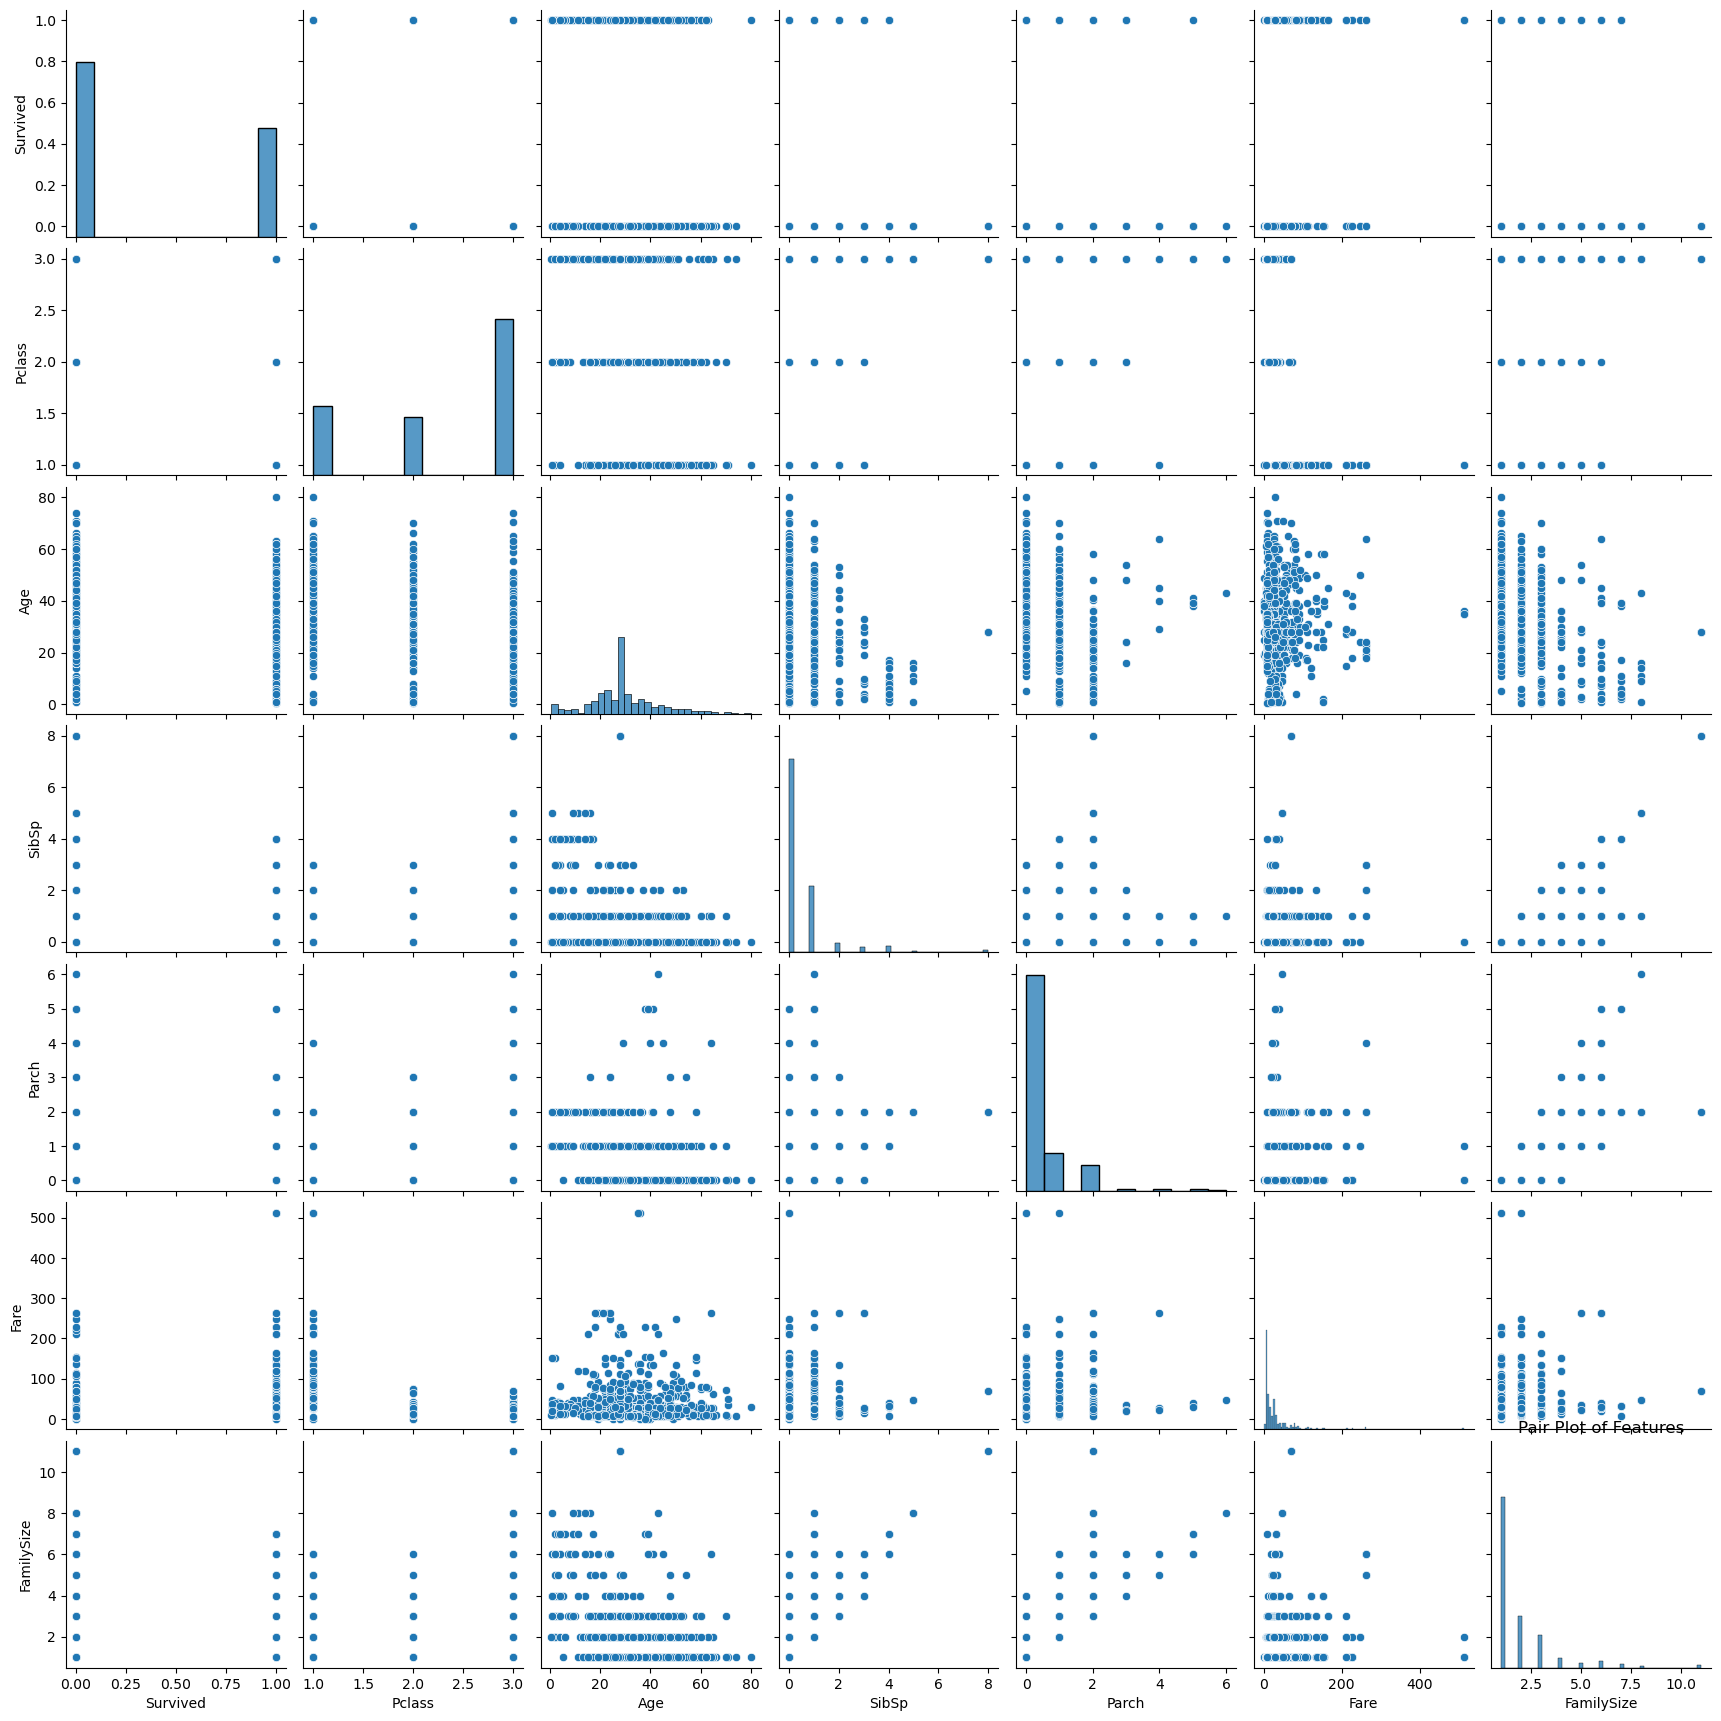

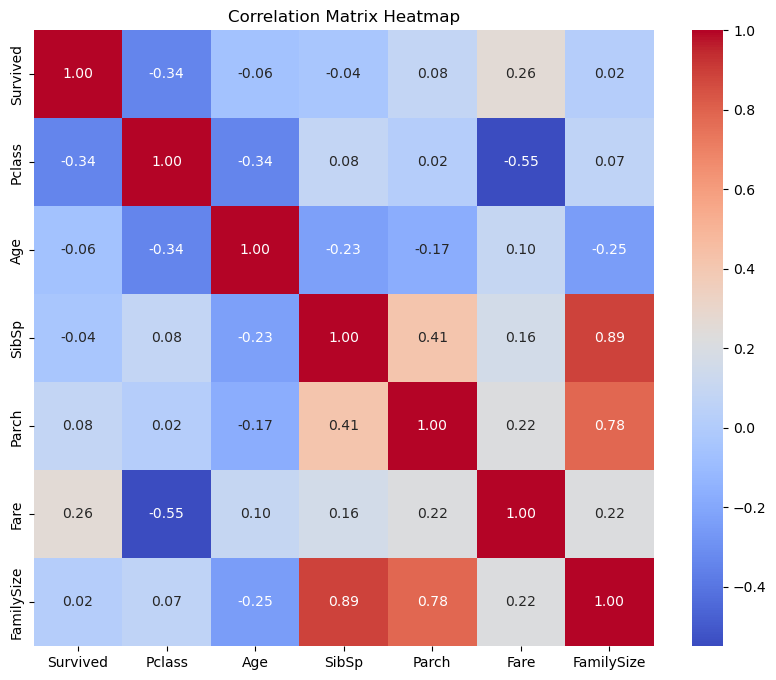

In [148]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
df = pd.read_csv('Titanic-Dataset.csv')

df.info()

# Check for missing values
print(df.isnull().sum())

# Summary statistics for numeric features
print(df.describe())

# Impute missing values for Age by median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Impute missing values for Embarked by mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column
df.drop('Cabin', axis=1, inplace=True)
df.drop('PassengerId', axis=1, inplace=True)

# Feature Engineering
# Create a new feature FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

display(df.head(5))


sns.countplot(data=df, x="Pclass")
plt.show()

sns.countplot(data=df, x="Embarked")
plt.show()

# Show survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()

# Survival rate by Age
df['Age_bins'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
sns.barplot(x='Age_bins', y='Survived', data=df)
plt.show()

# Survival rate by SibSp
sns.barplot(x='SibSp', y='Survived', data=df)
plt.show()

# Survival rate by Parch
sns.barplot(x='Parch', y='Survived', data=df)
plt.show()

# Survival rate by FamilySize
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.show()

# Survival rate by Fare
sns.barplot(data=df, x='Fare', hue='Survived')
plt.show()

# Survival rate by Embarked
sns.barplot(x='Embarked', y='Survived', data=df)
plt.show()

## Detect Outliers
# Boxplot for Age
sns.boxplot(data=df, x='Survived', y='Age')
plt.show()

# Boxplot for Fare
sns.boxplot(data=df, x='Survived', y='Fare')
plt.show()

# Paired plot for numerical features
# Measure the relationships between different features
# Visualize relationships using scatter plots
sns.pairplot(df)
plt.title('Pair Plot of Features')
plt.show()


#heatmap for correlation matrix
plt.figure(figsize=(10, 8))

correlation_matrix = np.corrcoef(df.select_dtypes(include=[np.number]).values.T)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=df.select_dtypes(include=[np.number]).columns, yticklabels=df.select_dtypes(include=[np.number]).columns)
plt.title('Correlation Matrix Heatmap')
plt.show()

# drop SibSp and Parch
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)




# Using Stochastic Gradient Descent to train model

SGD MSE: 6.1298737782321195


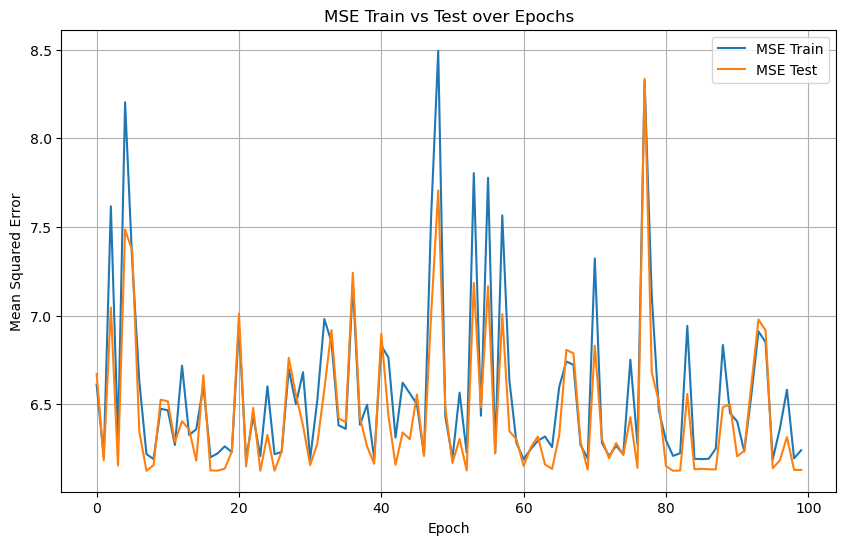

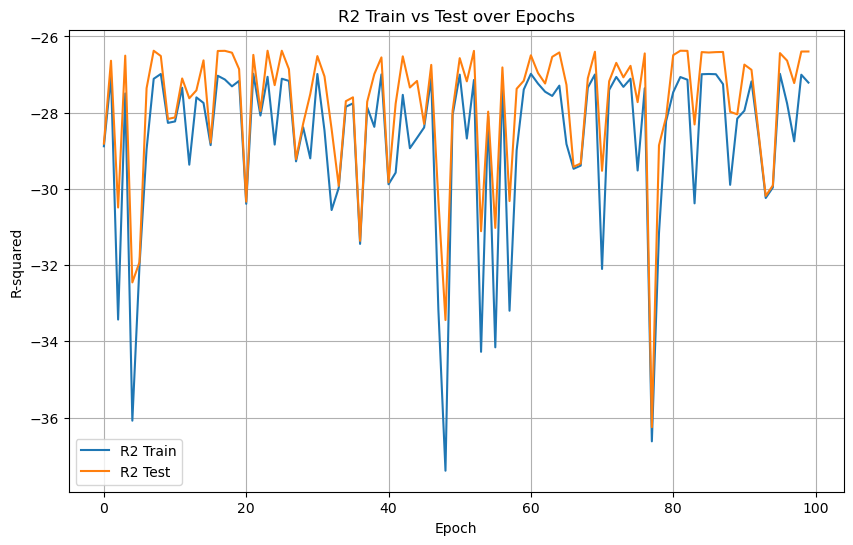

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Preprocessing the dataset
df["Sex"] = df["Sex"].map({"male": 1, "female": 0})

# Dropping unnecessary columns

# remove Fare outliers
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Fare'] >= lower_bound) & 
        (df['Fare'] <= upper_bound)]

# remove Age outliers
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Age'] >= lower_bound) & 
        (df['Age'] <= upper_bound)]

df = df.reset_index(drop=True)


X = df.drop(['Survived', 'Name', 'Ticket', 'Embarked', 'Age_bins'], axis=1)
y = df['Survived']

# Spliting the dataset into train and test sets [80:20]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy()  # Convert pandas.Series to numpy.ndarray
y_test = y_test.to_numpy()

# Stansdardizing the attributes of the Dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add the column of 1 values to X
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]


# Linear Regression Model
class LinearRegression:
    def __init__(self):
        self.theta = None
    
    def fit(self, X, y, X_test, y_test, lr=0.01, epochs=100, batch_size=None, verbose=True):
        self.theta = np.random.randn(X.shape[1])
        m = X.shape[0]
        loss_history = []
        r2_history = []
        loss_history_test = []
        r2_history_test = []

        for epoch in range(epochs):
            num_batches = m // batch_size if batch_size else 1
            for batch in range(num_batches):
                if batch_size:
                    indices = np.random.choice(m, batch_size)
                    X_batch = X[indices]
                    y_batch = y[indices]
                else:
                    X_batch = X
                    y_batch = y
                    
                # generating the predictions on X_batch
                y_pred = X_batch.dot(self.theta)
                error = y_pred - y_batch
            
                # computing the gradient of the loss function
                gradient = 2 * X_batch.T.dot(error)
                avg_gradient = sum(gradient) / X_batch.shape[0]
                # updating the weights with the computed gradient
                self.theta -= lr * avg_gradient
            
            
            y_pred = X.dot(self.theta)
            y_pred_test = X_test.dot(self.theta)
            
            mse = mean_squared_error(y, y_pred)
            loss_history.append(mse)
            r2 = r2_score(y, y_pred)
            r2_history.append(r2)

            mse_test = mean_squared_error(y_test, y_pred_test)
            r2_test = r2_score(y_test, y_pred_test)
            loss_history_test.append(mse_test)
            r2_history_test.append(r2_test)

        return loss_history, r2_history, loss_history_test, r2_history_test

# Stochastic Gradient Descent (SGD)
sgd_model = LinearRegression()
loss_history, r2_history, loss_history_test, r2_history_test = sgd_model.fit(X_train_scaled, y_train, X_test_scaled, y_test, batch_size=1)

# Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = X_test.dot(model.theta)
    mse = mean_squared_error(y_test, y_pred)
    return mse

sgd_mse = evaluate_model(sgd_model, X_test_scaled, y_test)

print("SGD MSE:", sgd_mse)

# Plot MSE
plt.figure(figsize=(10, 6))
plt.plot(range(100), loss_history, label='MSE Train')
plt.plot(range(100), loss_history_test, label='MSE Test')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE Train vs Test over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot R2
plt.figure(figsize=(10, 6))
plt.plot(range(100), r2_history, label='R2 Train')
plt.plot(range(100), r2_history_test, label='R2 Test')
plt.xlabel('Epoch')
plt.ylabel('R-squared')
plt.title('R2 Train vs Test over Epochs')
plt.legend()
plt.grid(True)
plt.show()



I thought that this model was performing poorly so I tested it with a polynomial regression model to see if increasing the complexity of the model would improve its performance. based on the test results it seems that increasing model complexity lead to an overall increase in the model MSE score.

Variance: 0.0788, Bias: 0.2238, Total error: 0.3026
Variance: 0.0840, Bias: 0.2303, Total error: 0.3143
Variance: 0.0779, Bias: 0.2214, Total error: 0.2994
Variance: 0.0742, Bias: 0.2283, Total error: 0.3025
Variance: 0.0770, Bias: 0.2057, Total error: 0.2827
Total error of the best model: 0.2827
Graphing the performance of the model on the test data


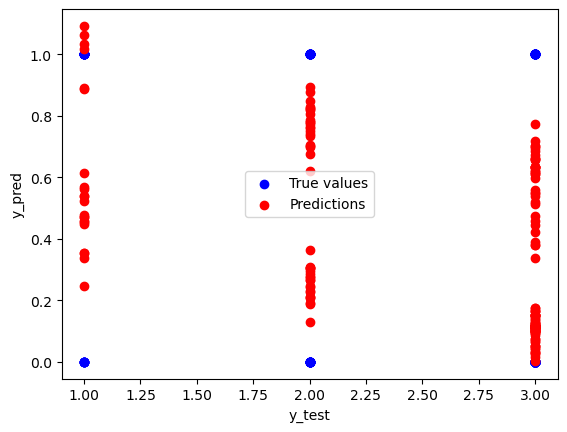

Degree: 1 MSE: 0.13034756953371895
Best model: LinearRegression()

Variance: 0.0937, Bias: 0.2238, Total error: 0.3175
Variance: 0.0936, Bias: 0.2304, Total error: 0.3240
Variance: 0.0881, Bias: 0.2215, Total error: 0.3096
Variance: 0.0734, Bias: 0.2292, Total error: 0.3025
Variance: 0.0938, Bias: 0.2065, Total error: 0.3003
Total error of the best model: 0.3003
Graphing the performance of the model on the test data


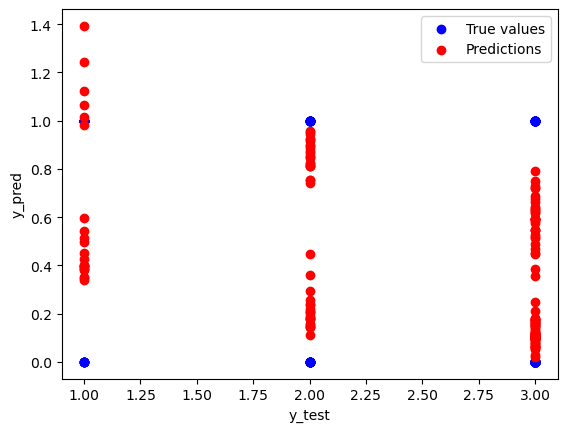

Degree: 2 MSE: 0.11943423169332847
Best model: LinearRegression()

Variance: 0.0928, Bias: 0.2242, Total error: 0.3171
Variance: 0.1106, Bias: 0.2303, Total error: 0.3410
Variance: 0.1597, Bias: 0.2214, Total error: 0.3812
Variance: 0.0907, Bias: 0.2280, Total error: 0.3187
Variance: 0.1191, Bias: 0.2076, Total error: 0.3268
Total error of the best model: 0.3171
Graphing the performance of the model on the test data


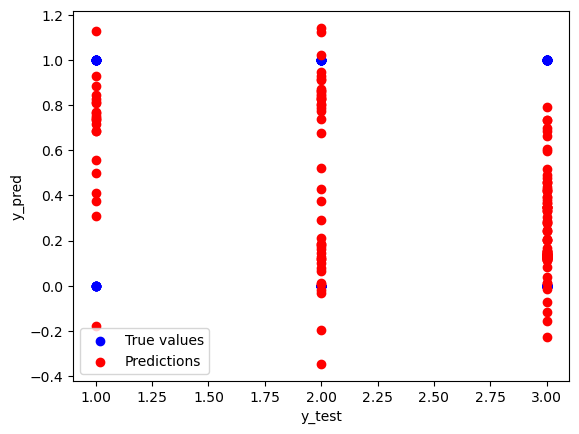

Degree: 3 MSE: 0.12955536748675428
Best model: LinearRegression()

Variance: 0.3366, Bias: 0.2239, Total error: 0.5605
Variance: 0.1810, Bias: 0.2303, Total error: 0.4113
Variance: 0.4534, Bias: 0.2214, Total error: 0.6748
Variance: 0.3305, Bias: 0.2269, Total error: 0.5574
Variance: 0.4605, Bias: 0.2032, Total error: 0.6637
Total error of the best model: 0.4113
Graphing the performance of the model on the test data


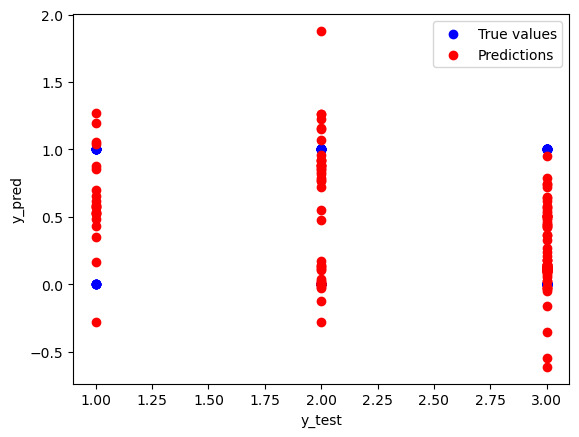

Degree: 4 MSE: 0.12070211857541223
Best model: LinearRegression()

Variance: 744.6780, Bias: 5.3508, Total error: 750.0288
Variance: 12.6303, Bias: 0.3163, Total error: 12.9466
Variance: 457.0346, Bias: 6.5753, Total error: 463.6099
Variance: 23.2528, Bias: 0.2952, Total error: 23.5481
Variance: 14.6638, Bias: 0.3073, Total error: 14.9712
Total error of the best model: 12.9466
Graphing the performance of the model on the test data


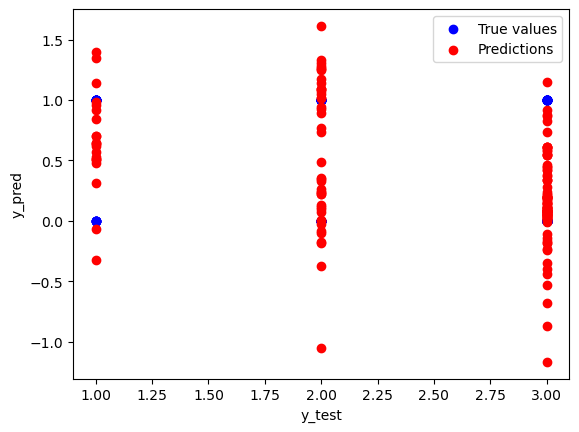

Degree: 5 MSE: 0.20437123190522757
Best model: LinearRegression()



In [150]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

def polynomial_regression(degree, X, y, folds, test_size=0.25, random_state=None):
    # Define number of folds for cross-validation
    kf = KFold(folds)

    # Initialize lists to store results for variance, bias, total_error, and models
    variances = []
    biases = []
    total_error = []
    models = []
    
    # Set the polynomial degree of the model
    poly_features = PolynomialFeatures(degree)
    X_poly = poly_features.fit_transform(X)

    # Perform cross-validation
    for train_index, test_index in kf.split(X_poly):
        # Split data into training and testing sets for this fold
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit polynomial regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate variance and bias for this fold
        variance = np.var(y_pred)
        bias = np.mean((np.mean(y_pred) - y_test) ** 2)
        
        # Append results to lists
        variances.append(variance)
        biases.append(bias)
        total_error.append(bias + variance)
        models.append(model)

        # Print results  including variance, Bias and the total_error for this fold. 
        print("Variance: {:.4f}, Bias: {:.4f}, Total error: {:.4f}".format(variance, bias, bias + variance))

    # print the total_error of the best model
    min_error_index = np.argmin(total_error)
    best_model = models[min_error_index]
    print("Total error of the best model: {:.4f}".format(total_error[min_error_index]))

    # Testing the final model on the test data
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=42)
    # Obtain the predictions on the test data
    y_pred = best_model.predict(X_test)
    
    # Graph the true values against the predicted values
    print("Graphing the performance of the model on the test data")
    plt.scatter(X_test[:, 1], y_test, c='blue', label='True values')
    plt.scatter(X_test[:, 1], y_pred, c='red', label='Predictions')
    plt.xlabel("y_test")
    plt.ylabel("y_pred")
    plt.legend()
    plt.show()
    
    # store mse score of the model applied on the test data
    mse = mean_squared_error(y_test, y_pred)
    
    return mse , best_model


degrees = range(1, 6)  # Try polynomial degrees from 1 to 5
# Try degrees from 1 to 5 and in a loop, report mse of the best model trained using k-fold cross validation and print("Degree:", degree, "MSE:", mse)
for degree in degrees:
    mse, best_model = polynomial_regression(degree, X, y, 5)
    print("Degree:", degree, "MSE:", mse)
    print("Best model:", best_model)
    print()

As you can see this model performs very poorly. As the Epochs increase the R2 and MSE increases which indicates that the model is overfitting. 

There are some steps we can take to increase the models performance:
- Use K-cross validation
- remove outliers in the dataset
- Add regularization (L1 or L2)
- Decrease the learning rate
- Get more datapoints (impossible)

# K-Cross Validation

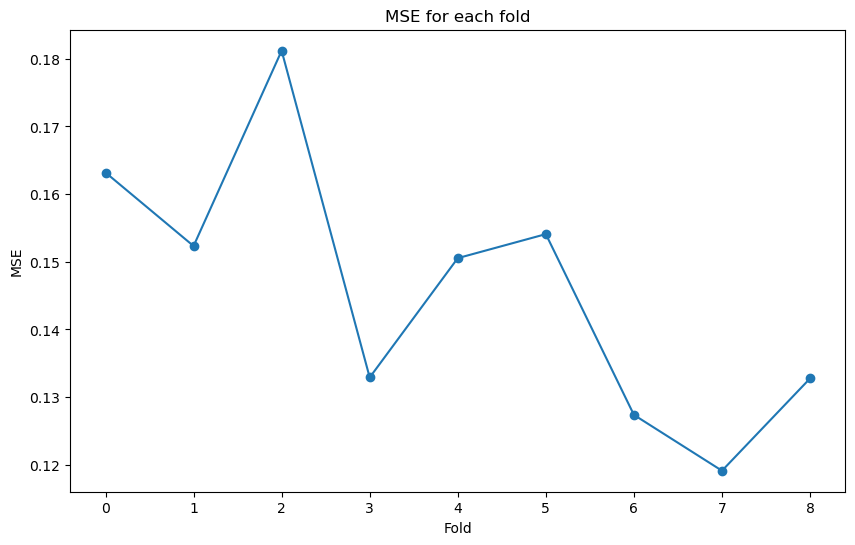

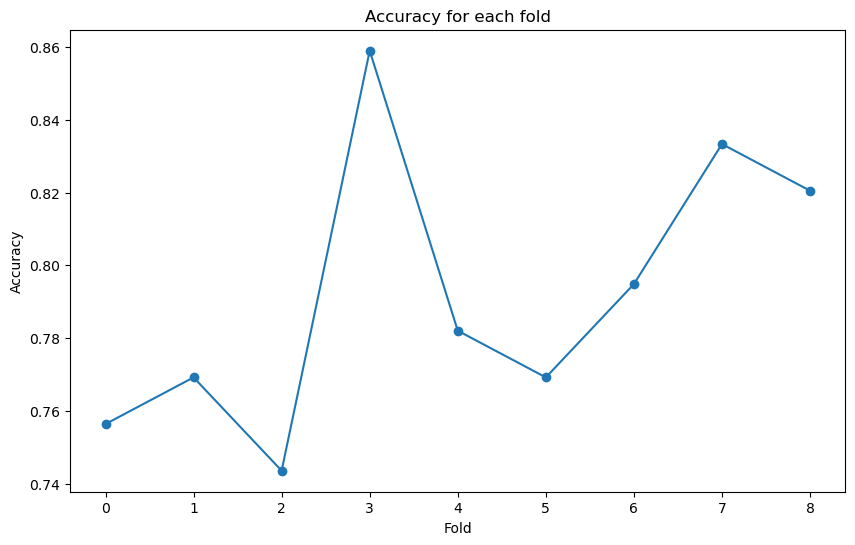

Best model:  [-0.07361056 -0.24305545 -0.05028568  0.08171211 -0.09477147]
MSE of best model:  0.1191119661843478
accuracy_score of best model:  0.8333333333333334

Mean MSE:  0.14594251436974923
Mean R2:  0.33538335702044714


In [151]:
from sklearn.linear_model import LinearRegression

mean = X.mean()
std = X.std()
normalized_X = (X - mean) / std

# Initialize the number of folds for cross-validation
k = 9

# Calculate the size of each fold
fold_size = len(normalized_X) // k

# Initialize the lists to store the MSE and R2 scores
MSE_scores = []
R2_scores = []
accuracy_scores = []
models = []

for i in range(k):
  # Get the testing fold and the training folds
  # Example 
  # | --- --- --- --- *** --- --- --- --- --- |
  #    0   1   2   3   4   5   6   7   8   9 
  # * represents the testing fold
  # - represents the training fold
  # i = 0: 
  # X_test_range = [i * fold_size : (i + 1) * fold_size]
  # X_train_range = [: i * fold_size] + [(i + 1) * fold_size : ]
    
  # Test fold
  X_test = normalized_X[i * fold_size:(i + 1) * fold_size]
  y_test = y[i * fold_size:(i + 1) * fold_size]
  # Train fold
  X_train = pd.concat([normalized_X[:i * fold_size], normalized_X[(i + 1) * fold_size:]])
  y_train = np.concatenate([y[:i * fold_size], y[(i + 1) * fold_size:]])
  
  # Train the model
  model = LinearRegression()
  model.fit(X_train, y_train)
  models.append(model)
  
  # Predict the target values
  y_pred = model.predict(X_test)
  
  # Calculate the MSE and R2 scores
  mse = mean_squared_error(y_test, y_pred)
  MSE_scores.append(mse)
  r2 = r2_score(y_test, y_pred)
  R2_scores.append(r2)
  accuracy_scores.append(accuracy_score(y_test, np.round(y_pred)))

# Plot the MSE scores for each fold
plt.figure(figsize=(10, 6))
plt.plot(range(k), MSE_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.title('MSE for each fold')
plt.show() 

# Plot the Accuracy scores for each fold
plt.figure(figsize=(10, 6))
plt.plot(range(k), accuracy_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy for each fold')
plt.show() 

# Find the model with the lowest MSE
best_model = models[np.argmin(MSE_scores)]
print("Best model: ", best_model.coef_)
print("MSE of best model: ", min(MSE_scores))
print("accuracy_score of best model: ", accuracy_scores[np.argmin(MSE_scores)])



# Calculate the mean MSE and R2 scores
mean_MSE = np.mean(MSE_scores)
mean_R2 = np.mean(R2_scores)
print()
print("Mean MSE: ", mean_MSE)
print("Mean R2: ", mean_R2)

# Spliting the dataset into train and test sets [80:20]
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.2, random_state=42)


# Neural Network

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from tensorflow.keras.regularizers import l1, l2

# Define the neural network architecture
def create_model(learning_rate=0.001, momentum=0.9, dropout_rate=0.2, num_layers=1, neurons_per_layer=4, regularizer_type='l1', regularization_param=0.01):
    model = Sequential()
    
    # Choose regularizer
    if regularizer_type == 'l1':

        regularizer = l1(regularization_param)
    elif regularizer_type == 'l2':
        regularizer = l2(regularization_param)
    else:
        regularizer = None
    
    # add input layer
    model.add(Input(shape=(X.shape[1],)))
    # add hidden layers
    for i in range(num_layers - 1):
        model.add(Dense(neurons_per_layer, activation='relu'))
        model.add(Dropout(dropout_rate))
    # add output layer
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizer))

    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])
    return model


# Hyper Parameter Tuning

In [153]:
'''
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

# Define parameter grid
param_grid = {
    'model__learning_rate': [0.01, 0.1],
    'model__momentum': [0.95, 0.99],
    'model__num_layers': [1, 2],
    'model__neurons_per_layer': [2, 3], 
    'batch_size': [100, 200]
}

# Wrap your model with scikeras KerasRegressor
model = KerasRegressor(model=create_model, epochs=50, batch_size=32, verbose=0)

# Use tqdm for GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')

# Train the model with grid search
grid_result = grid.fit(X_train, y_train)

# Print the best hyperparameters and accuracy
print("Best parameters: ", grid_result.best_params_)
print("Best score: ", grid_result.best_score_)'''


'\nfrom sklearn.model_selection import GridSearchCV\nfrom scikeras.wrappers import KerasRegressor\n\n# Define parameter grid\nparam_grid = {\n    \'model__learning_rate\': [0.01, 0.1],\n    \'model__momentum\': [0.95, 0.99],\n    \'model__num_layers\': [1, 2],\n    \'model__neurons_per_layer\': [2, 3], \n    \'batch_size\': [100, 200]\n}\n\n# Wrap your model with scikeras KerasRegressor\nmodel = KerasRegressor(model=create_model, epochs=50, batch_size=32, verbose=0)\n\n# Use tqdm for GridSearchCV\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=\'r2\')\n\n# Train the model with grid search\ngrid_result = grid.fit(X_train, y_train)\n\n# Print the best hyperparameters and accuracy\nprint("Best parameters: ", grid_result.best_params_)\nprint("Best score: ", grid_result.best_score_)'

# Visualize MSE

Best batch size: 200
Best learning rate: 0.1
Best momentum: 0.95
Best number of layers: 2
Best number of neurons per layer: 3


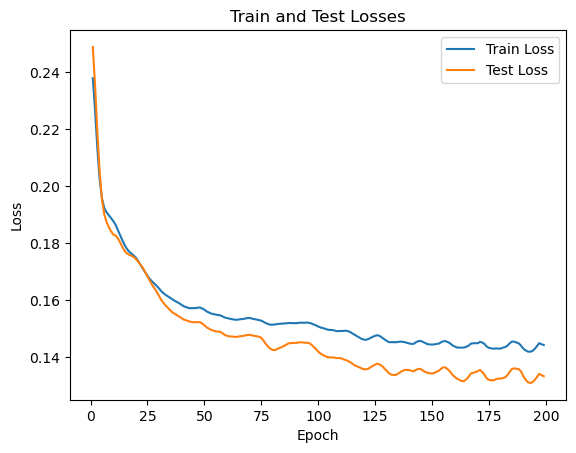

In [154]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scikeras.wrappers import KerasRegressor

# grab the best hyperparameters
if grid_result is None:
    best_batch_size = 100
    best_learning_rate = 0.1
    best_momentum = 0.95
    best_neurons_per_layer = 2
    best_num_layers = 2
else:
    best_batch_size = grid_result.best_params_['batch_size']
    best_learning_rate = grid_result.best_params_['model__learning_rate']
    best_momentum = grid_result.best_params_['model__momentum']
    best_num_layers = grid_result.best_params_['model__num_layers']
    best_neurons_per_layer = grid_result.best_params_['model__neurons_per_layer']

# Print the best hyperparameters
print(f"Best batch size: {best_batch_size}")
print(f"Best learning rate: {best_learning_rate}")
print(f"Best momentum: {best_momentum}")
print(f"Best number of layers: {best_num_layers}")
print(f"Best number of neurons per layer: {best_neurons_per_layer}")

# Create the best model
best_model = create_model(learning_rate=best_learning_rate, momentum=best_momentum, num_layers=best_num_layers, neurons_per_layer=best_neurons_per_layer)
model = KerasRegressor(model=best_model, epochs=200, batch_size=best_batch_size, verbose=0)

# store the train and test losses
train_losses = []
test_losses = []

patience = 10  # Number of epochs with little improvement after which training will be stopped
best_loss = float('inf')

# Train the model
for epoch in range(1, 200):
    # Fit the model
    model.partial_fit(X_train, y_train)
    
    # Calculate train loss
    train_loss = mean_squared_error(y_train, model.predict(X_train))
    train_losses.append(train_loss)
    
    # Calculate test loss
    test_loss = mean_squared_error(y_test, model.predict(X_test))
    test_losses.append(test_loss)
    
    # Check to see if test loss has improved or not 
    if test_loss < best_loss+0.001:
        best_loss = test_loss
        patience_counter = 0  # Reset patience counter
    else:
        patience_counter += 1
    
    # Stop training if patience is exceeded
    if patience_counter >= patience:
        print(f"Early stopping triggered at epoch {epoch}")
        break

# Plot train and test losses
plt.plot(np.arange(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(np.arange(1, len(test_losses) + 1), test_losses, label='Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Test Losses')
plt.show()
